## **MENYIAPKAN DATA**

In [4]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

df = pd.read_csv("../data iris.csv", delimiter=";")

df.head()

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## **FORMAT DATA**

In [5]:
df["class"].unique()

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

## **DATA OUTLIERS**

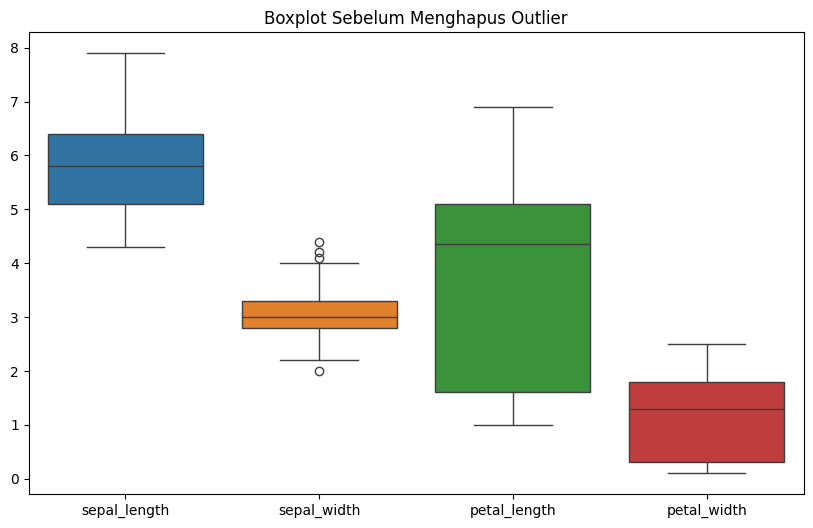

In [6]:
# Boxplot sebelum menghapus outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, :-1])  # Exclude kolom 'class'
plt.title("Boxplot Sebelum Menghapus Outlier")
plt.show()

In [7]:
# Hitung Q1, Q3, dan IQR untuk setiap kolom numerik
Q1 = df.iloc[:, :-1].quantile(0.25)
Q3 = df.iloc[:, :-1].quantile(0.75)
IQR = Q3 - Q1

# Batas bawah dan atas
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

print(f"Jumlah data sebelum menghapus outlier: {df.shape[0]}")

# Hapus outlier
df = df[~((df.iloc[:, :-1] < lower_bound) | (df.iloc[:, :-1] > upper_bound)).any(axis=1)]

print(f"Jumlah data setelah menghapus outlier: {df.shape[0]}")


Jumlah data sebelum menghapus outlier: 150
Jumlah data setelah menghapus outlier: 146


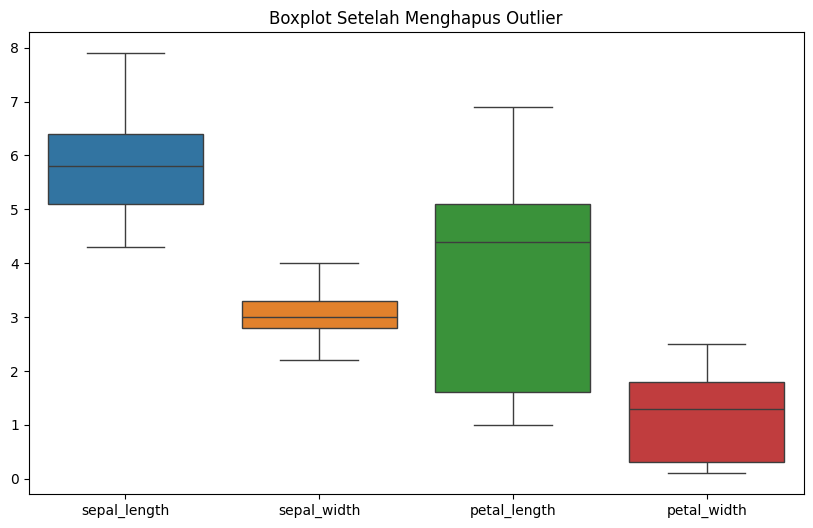

In [8]:
# Boxplot setelah menghapus outlier
plt.figure(figsize=(10, 6))
sns.boxplot(data=df.iloc[:, :-1])  # Exclude kolom 'class'
plt.title("Boxplot Setelah Menghapus Outlier")
plt.show()


## **DATA DUPLIKASI**

In [9]:
df[df.duplicated()]

,sepal_length,sepal_width,petal_length,petal_width,class
34,4.9,3.1,1.5,0.1,Iris-setosa
37,4.9,3.1,1.5,0.1,Iris-setosa
142,5.8,2.7,5.1,1.9,Iris-virginica


In [10]:
df.drop_duplicates(inplace=True)
df.shape

(143, 5)

In [11]:
df.isna().sum()

sepal_length    0
sepal_width     0
petal_length    0
petal_width     0
class           0
dtype: int64

# **MODELING**

In [12]:
from sklearn.model_selection import train_test_split


In [13]:
X = df.drop(columns="class")
y = df['class']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

X_train

,sepal_length,sepal_width,petal_length,petal_width
90,5.5,2.6,4.4,1.2
29,4.7,3.2,1.6,0.2
45,4.8,3.0,1.4,0.3
92,5.8,2.6,4.0,1.2
25,5.0,3.0,1.6,0.2
...,...,...,...,...
77,6.7,3.0,5.0,1.7
112,6.8,3.0,5.5,2.1
14,5.8,4.0,1.2,0.2
98,5.1,2.5,3.0,1.1


In [14]:
X_train.shape, X_test.shape


((100, 4), (43, 4))

## **MODEL TRAINING AND EVALUATION**

In [15]:

# import SVC classifier
from sklearn.svm import SVC


# import metrics to compute accuracy
from sklearn.metrics import accuracy_score


# instantiate classifier with default hyperparameters
svc=SVC() 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with default hyperparameters: {0:0.4f}'. format(accuracy_score(y_test, y_pred)))

Model accuracy score with default hyperparameters: 0.9070


In [16]:
# instantiate classifier with rbf kernel and C=100
svc=SVC(C=100.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with rbf kernel and C=100.0 : 0.9535


In [17]:
# instantiate classifier with rbf kernel and C=1000
svc=SVC(C=1000.0) 


# fit classifier to training set
svc.fit(X_train,y_train)


# make predictions on test set
y_pred=svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with rbf kernel and C=1000.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with rbf kernel and C=1000.0 : 0.9535


In [18]:
# instantiate classifier with linear kernel and C=1.0
linear_svc=SVC(kernel='linear', C=1.0) 


# fit classifier to training set
linear_svc.fit(X_train,y_train)


# make predictions on test set
y_pred_test=linear_svc.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=1.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred_test)))

Model accuracy score with linear kernel and C=1.0 : 0.9767


In [21]:
# instantiate classifier with linear kernel and C=100.0
linear_svc100=SVC(kernel='linear', C=100.0) 


# fit classifier to training set
linear_svc100.fit(X_train, y_train)


# make predictions on test set
y_pred=linear_svc100.predict(X_test)


# compute and print accuracy score
print('Model accuracy score with linear kernel and C=100.0 : {0:0.4f}'. format(accuracy_score(y_test, y_pred)))


Model accuracy score with linear kernel and C=100.0 : 0.9302


In [23]:
y_pred_train = linear_svc.predict(X_train)


In [24]:
print('Training-set accuracy score: {0:0.4f}'. format(accuracy_score(y_train, y_pred_train)))

Training-set accuracy score: 0.9900


In [25]:
# print the scores on training and test set

print('Training set score: {:.4f}'.format(linear_svc.score(X_train, y_train)))

print('Test set score: {:.4f}'.format(linear_svc.score(X_test, y_test)))

Training set score: 0.9900
Test set score: 0.9767


In [26]:
# check class distribution in test set

y_test.value_counts()

class
Iris-virginica     16
Iris-setosa        14
Iris-versicolor    13
Name: count, dtype: int64

In [27]:
# check null accuracy score

null_accuracy = (3306/(3306+274))

print('Null accuracy score: {0:0.4f}'. format(null_accuracy))

Null accuracy score: 0.9235


Confusion matrix

 [[14  0  0]
 [ 0 12  1]
 [ 0  2 14]]


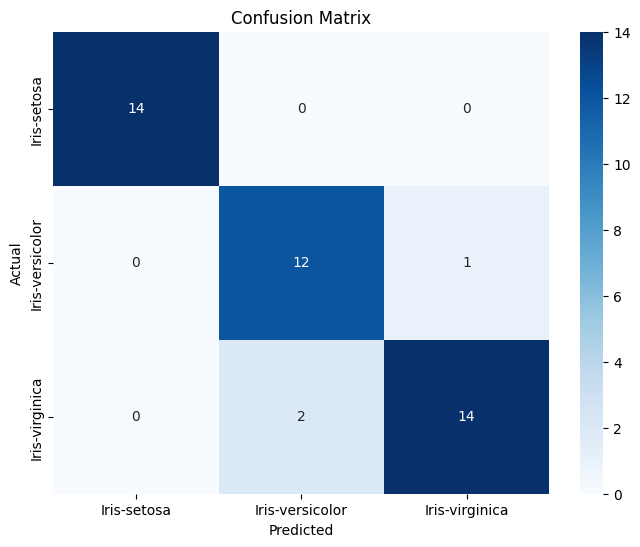

In [28]:
# Print the Confusion Matrix and slice it into four pieces

from sklearn.metrics import confusion_matrix

cm = confusion_matrix(y_test, y_pred)

print('Confusion matrix\n\n', cm)
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap='Blues', xticklabels=df['class'].unique(), yticklabels=df['class'].unique())
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()